In [1]:

from rl_qoc import QuantumEnvironment, ChannelReward, QiskitConfig, QEnvConfig, ExecutionConfig, GateTarget, FidelityReward
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit.library import RXGate, UGate, RZXGate
from gymnasium.spaces import Box
import numpy as np
seed = 30980922
np.random.seed(seed)
params = ParameterVector("a", 1)
angle = np.random.uniform(-np.pi, np.pi, size=(1,))
angle = np.array([np.pi/2])
gate = RXGate(*angle)
target = GateTarget(gate, (0,))
def apply_qc(qc:QuantumCircuit, params, qreg):
    # qc.rzx(params[0], qreg[0], qreg[1])
    qc.rx(params[0], qreg[0])

action_space = Box(-np.pi, np.pi, shape=(1,))
backend_config = QiskitConfig(apply_qc)
exec = ExecutionConfig(sampling_paulis=10000, n_shots=1, batch_size=1, n_reps=list(range(1, 30)),
                       dfe_precision=(0.01, 0.01), seed=seed,
                       c_factor=1)
reward1 = ChannelReward()
reward2 = FidelityReward()
q_env_config1 = QEnvConfig(target, backend_config, action_space, reward=reward1,
                          execution_config=exec)
q_env1 = QuantumEnvironment(q_env_config1)

q_env_config2 = QEnvConfig(target, backend_config, action_space, reward=reward2,
                          execution_config=exec)
q_env2 = QuantumEnvironment(q_env_config2)


/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Coding_projects/Quantum_Optimal_Control/rl_qoc/helpers/__init__.py:9: UserWarning: pulse_utils is not available
  warnings.warn("pulse_utils is not available")
/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Coding_projects/Quantum_Optimal_Control/.venv/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Cod

In [2]:
print(gate.to_matrix())

[[0.70710678+0.j         0.        -0.70710678j]
 [0.        -0.70710678j 0.70710678+0.j        ]]


In [3]:
angle


array([1.57079633])

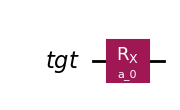

In [4]:
q_env1.circuit.draw("mpl")

In [8]:
data = reward1.get_reward_data(q_env1.circuit, np.zeros((1, 1)), q_env1.config)

KeyboardInterrupt: 

In [25]:
reward1.get_reward_with_primitive(data, q_env1.estimator)

array([0.59668057])

In [7]:
data.fiducials

[(PauliList(['Z']),
  SparsePauliOp(['Y'],
                coeffs=[0.16865+0.j])),
 (PauliList(['Y']),
  SparsePauliOp(['Z'],
                coeffs=[0.1633+0.j])),
 (PauliList(['X']),
  SparsePauliOp(['X'],
                coeffs=[0.16805+0.j]))]

In [8]:
data2 = reward2.get_reward_data(q_env2.circuit, np.zeros((1, 1)), q_env2.config)

In [26]:
reward2.get_reward_with_primitive(data2, q_env2.estimator)

array([[0.66666667]])

In [1]:
data.fiducials

NameError: name 'data' is not defined

In [11]:
target.Chi(1)

array([ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.22044605e-16,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.00000000e+00,  2.22044605e-16])

Number of repetitions: 1
Reward (avg): 0.9471569949359656 Std: 0.0
Number of repetitions: 2
Reward (avg): 0.8053822788490477 Std: 0.0
Number of repetitions: 3
Reward (avg): 0.6196266639800445 Std: 0.0
Number of repetitions: 4
Reward (avg): 0.44878545971212963 Std: 0.0
Number of repetitions: 5
Reward (avg): 0.34702524177895394 Std: 0.0
Number of repetitions: 6
Reward (avg): 0.3466099044498779 Std: 0.0
Number of repetitions: 7
Reward (avg): 0.4476711337604034 Std: 0.0
Number of repetitions: 8
Reward (avg): 0.6181666553971286 Std: 0.0
Number of repetitions: 9
Reward (avg): 0.8040394950805855 Std: 0.0
Number of repetitions: 10
Reward (avg): 0.9463571763588178 Std: 0.0
Number of repetitions: 11
Reward (avg): 0.9999967355169018 Std: 0.0
Number of repetitions: 12
Reward (avg): 0.9479513195774985 Std: 0.0
Number of repetitions: 13
Reward (avg): 0.8067223456088817 Std: 0.0
Number of repetitions: 14
Reward (avg): 0.6210875939307233 Std: 0.0
Number of repetitions: 15
Reward (avg): 0.4499040532809

[[np.float64(0.9471569949359656),
  np.float64(0.8053822788490477),
  np.float64(0.6196266639800445),
  np.float64(0.44878545971212963),
  np.float64(0.34702524177895394),
  np.float64(0.3466099044498779),
  np.float64(0.4476711337604034),
  np.float64(0.6181666553971286),
  np.float64(0.8040394950805855),
  np.float64(0.9463571763588178),
  np.float64(0.9999967355169018),
  np.float64(0.9479513195774985),
  np.float64(0.8067223456088817),
  np.float64(0.6210875939307233),
  np.float64(0.4499040532809619),
  np.float64(0.34744683989220543),
  np.float64(0.34620083604014745),
  np.float64(0.4465610972519727),
  np.float64(0.6167075967790153),
  np.float64(0.8026940206044637),
  np.float64(0.9455518795120191),
  np.float64(0.9999869421315468),
  np.float64(0.9487401347250586),
  np.float64(0.8080596691123345),
  np.float64(0.6225494166340777),
  np.float64(0.45102689255712125),
  np.float64(0.3478746905318328),
  np.float64(0.345798044562144),
  np.float64(0.44545537192900975)],
 [np.flo

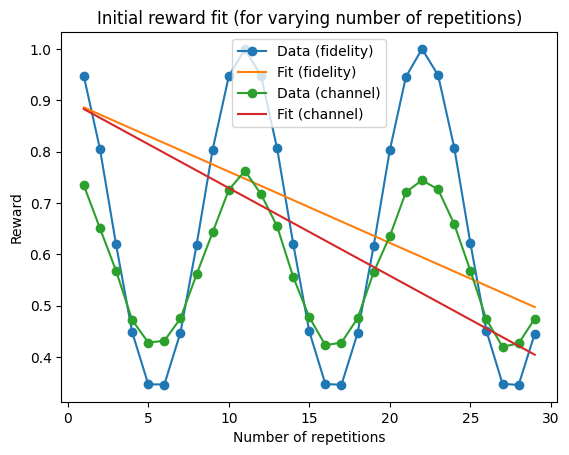

In [13]:
q_env1.initial_reward_fit(np.ones(1), reward_method=["fidelity", "channel"])
